In [1]:
import pandas as pd
autos_df = pd.read_csv('autos.csv',encoding = 'iso-8859-1')
print(autos_df.columns)
autos_df.drop(['lastSeen','nrOfPictures','dateCreated','postalCode','seller','dateCrawled'],axis = 'columns')

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')


,name,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Golf_3_1.6,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,A5_Sportback_2.7_Tdi,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,"Jeep_Grand_Cherokee_""Overland""",Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,GOLF_4_1_4__3TÜRER,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,Skoda_Fabia_1.4_TDI_PD_Classic,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,Suche_t4___vito_ab_6_sitze,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN
371524,Smart_smart_leistungssteigerung_100ps,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein
371526,VW_Golf_Kombi_1_9l_TDI,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN


In [2]:
print("Размер входных данных до удаления ",autos_df.shape[0])
#удаление повторов
nondup_autos_df = autos_df.drop_duplicates(['name','offerType','price','vehicleType','yearOfRegistration','gearbox','powerPS',
                          'model','kilometer','monthOfRegistration','fuelType','brand','notRepairedDamage'], keep = 'last')
#удаление строк с пропусками в данных
nondup_autos_df = nondup_autos_df.dropna()
print("Размер входных данных поесле удаления ",nondup_autos_df.shape[0])

Размер входных данных до удаления  371528
Размер входных данных поесле удаления  254921


Размер входных данных до удаления  371528
Размер входных данных поесле удаления  12805


<AxesSubplot:>

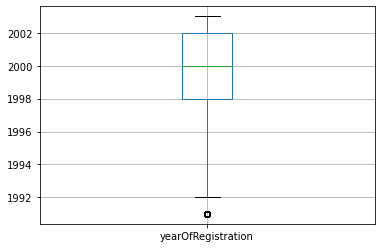

In [3]:
%matplotlib inline
print("Размер входных данных до удаления ",autos_df.shape[0])
#print(autos_df.columns)
part_autos_df = autos_df[(autos_df['yearOfRegistration'] < 2004) &
                         (autos_df['yearOfRegistration'] > 1990) &
                         (autos_df['price'] > 1000) & (autos_df['price'] < 5000) &
                         (autos_df['powerPS'] > 150) & (autos_df['powerPS'] < 250)]
print("Размер входных данных поесле удаления ",part_autos_df.shape[0])
part_autos_df.boxplot(column = ['yearOfRegistration'])

<AxesSubplot:>

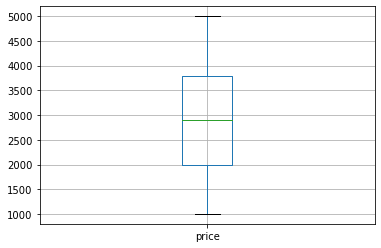

In [4]:
part_autos_df.boxplot(column = ['price'])

<AxesSubplot:>

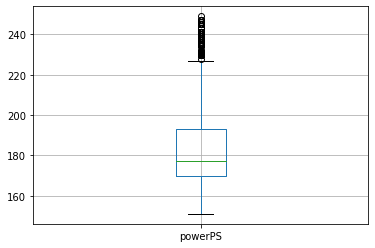

In [5]:
part_autos_df.boxplot(column = ['powerPS'])

In [6]:
filled_autos_df = nondup_autos_df.fillna('No info')
filled_autos_df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371520,2016-03-19 19:53:49,turbo_defekt,privat,Angebot,3200,control,limousine,2004,manuell,225,leon,150000,5,benzin,seat,ja,2016-03-19 00:00:00,0,96465,2016-03-19 20:44:43
371521,2016-03-27 20:36:20,Opel_Zafira_1.6_Elegance_TÜV_12/16,privat,Angebot,1150,control,bus,2000,manuell,0,zafira,150000,3,benzin,opel,nein,2016-03-27 00:00:00,0,26624,2016-03-29 10:17:23
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26


<AxesSubplot:>

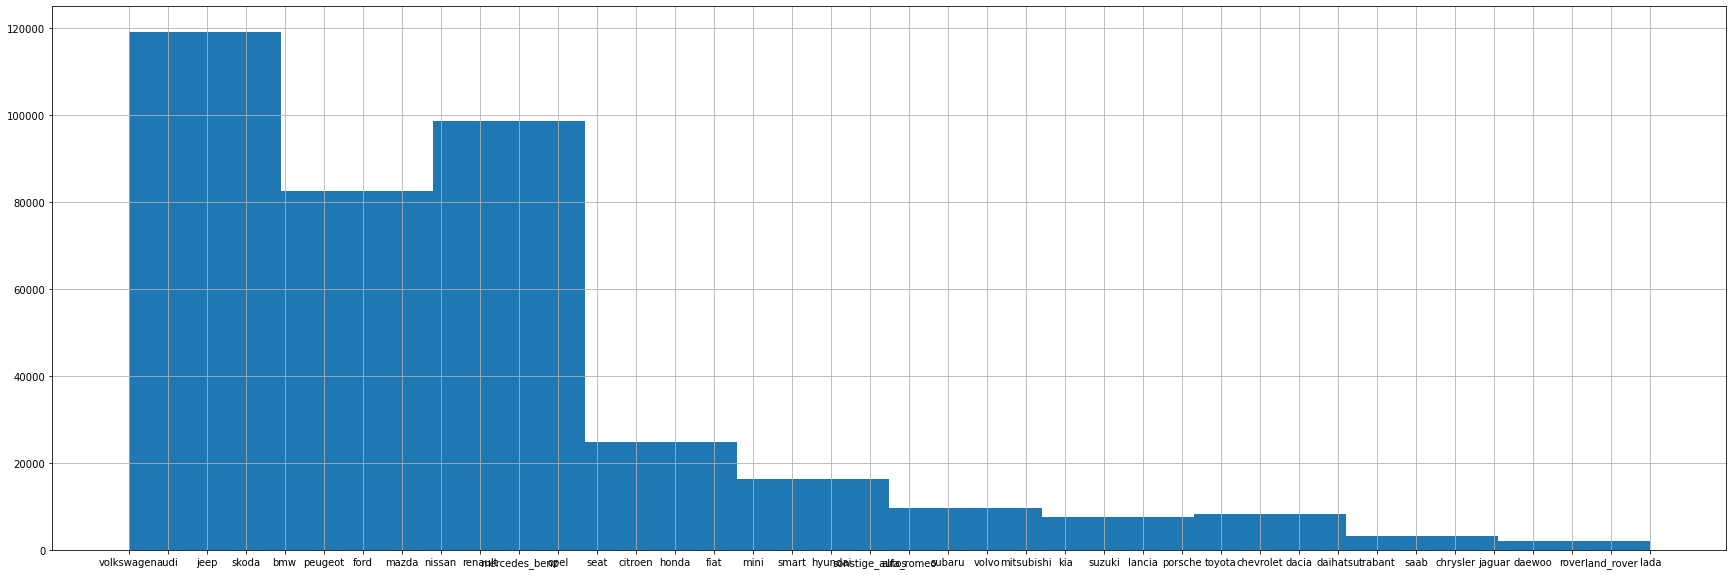

In [7]:
autos_df['brand'].hist(figsize = (30,10), xlabelsize = 10)

<AxesSubplot:>

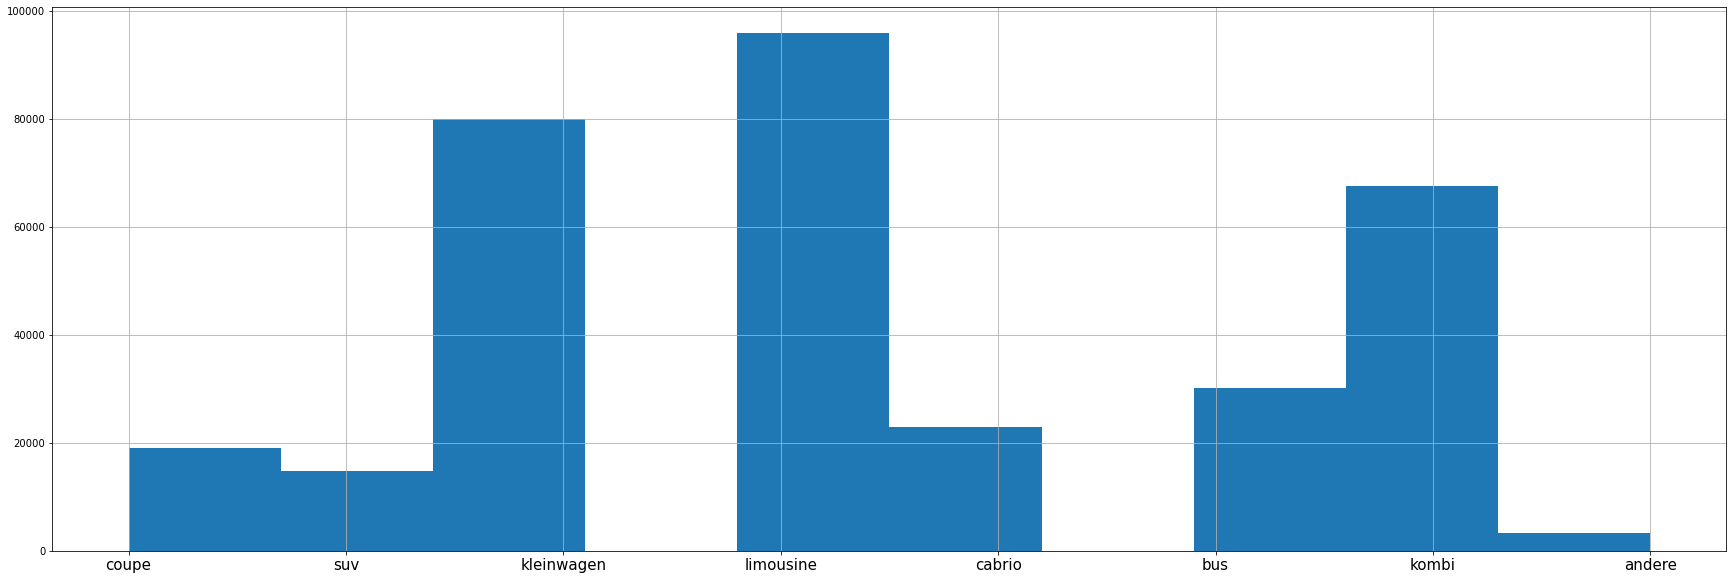

In [8]:
autos_df['vehicleType'].hist(figsize = (30,10), xlabelsize = 15)

<AxesSubplot:>

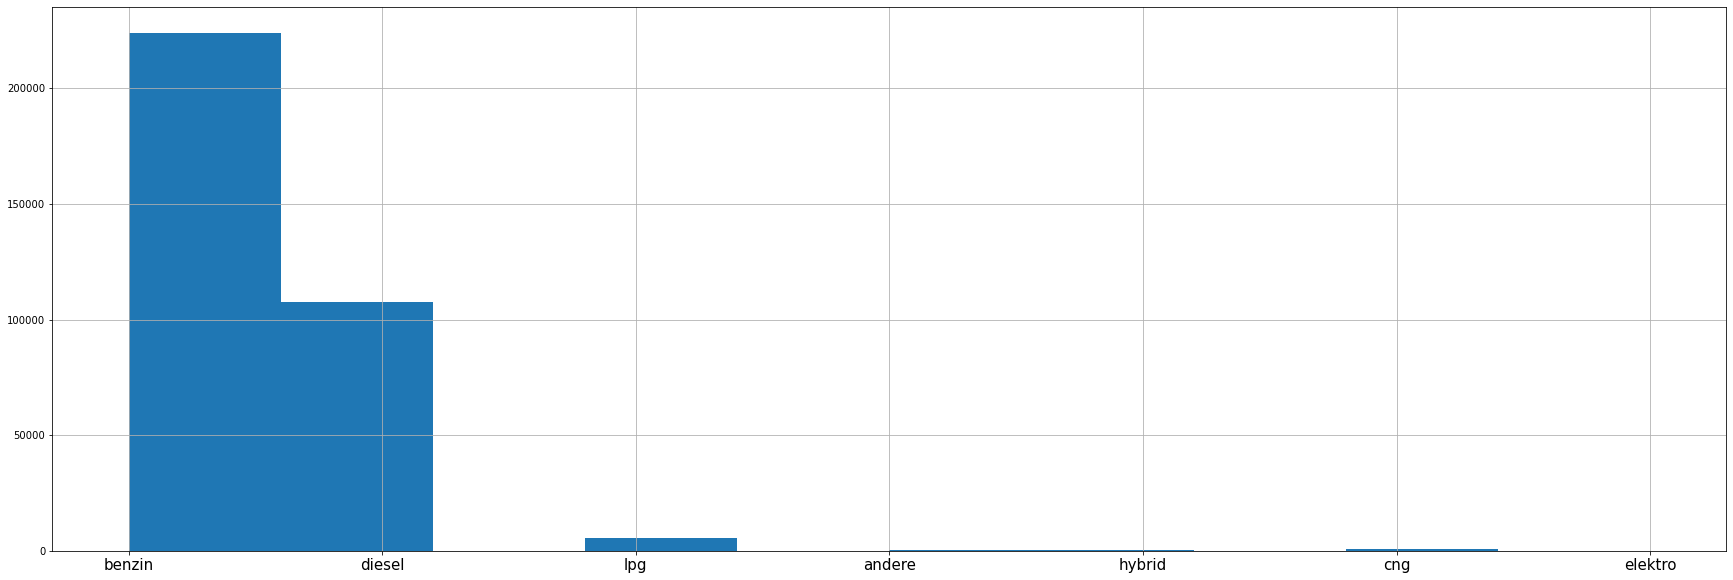

In [9]:
autos_df['fuelType'].hist(figsize = (30,10), xlabelsize = 15)

In [10]:
autos_df['length'] = autos_df['name'].str.len()
autos_df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,length
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,...,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57,10
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,...,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50,20
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,...,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46,30
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,...,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17,18
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,...,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,...,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52,26
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,...,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12,37
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,...,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26,34
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,...,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21,22


,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode,length
price,1.000000,-0.000182,0.006850,-0.000635,-0.002826,NaN,-0.003164,-0.000053
yearOfRegistration,-0.000182,1.000000,0.000351,-0.055319,-0.011607,NaN,-0.001652,0.001982
powerPS,0.006850,0.000351,1.000000,-0.010738,0.044358,NaN,0.027113,0.010299
kilometer,-0.000635,-0.055319,-0.010738,1.000000,0.001838,NaN,-0.026694,-0.021107
monthOfRegistration,-0.002826,-0.011607,0.044358,0.001838,1.000000,NaN,0.014963,0.013950
nrOfPictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
postalCode,-0.003164,-0.001652,0.027113,-0.026694,0.014963,NaN,1.000000,-0.011996
length,-0.000053,0.001982,0.010299,-0.021107,0.013950,NaN,-0.011996,1.000000


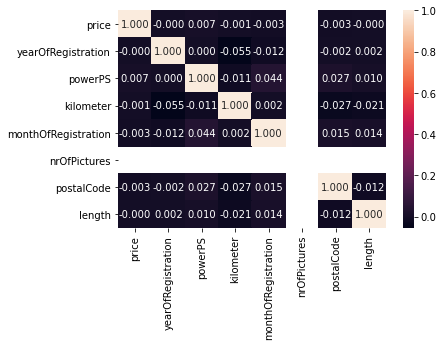

In [11]:
import seaborn as sns
sns.heatmap(autos_df.corr(), annot = True, fmt='.3f')
autos_df.corr()

Коэффициенты корелляции
Пирсона -  (-0.005122782003536024, 0.009696133306093728)
Спирмена - SpearmanrResult(correlation=0.03786079449110319, pvalue=1.6385071177569834e-81)
допустимое значение pvalue


<AxesSubplot:ylabel='Density'>

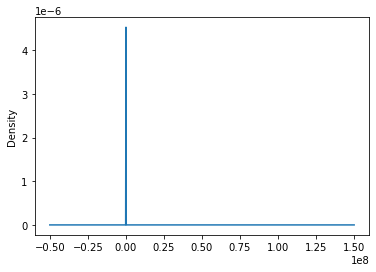

In [12]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_pr = pd.Series(le.fit_transform(filled_autos_df['price']))
data_vt = pd.Series(le.fit_transform(filled_autos_df['vehicleType']))
spearman = spearmanr(data_pr, data_vt)
print('Коэффициенты корелляции')
print('Пирсона - ', pearsonr(data_pr, data_vt))
print('Спирмена -', spearman)
if spearman[1] < 0.05:
    print("допустимое значение pvalue")
else:
    print("недопустимое значение pvalue")
filled_autos_df.price.plot.kde()

In [13]:
autos_df['dateOfRegistration'] = autos_df['yearOfRegistration'] + autos_df['monthOfRegistration']
autos_df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,length,dateOfRegistration
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,...,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57,10,1993
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,...,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50,20,2016
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,...,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46,30,2012
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,...,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17,18,2007
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,...,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21,30,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,...,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52,26,2006
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,...,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12,37,2003
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,...,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26,34,1999
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,...,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21,22,2008
